In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [25]:
# Load data
path = os.path.join("..", "..", "data", "csvresults", "rerun_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_mae,reg_mse,reg_loss,hl_mae,hl_mse,hl_loss
game,,,,,,
Freeway,0.003798,0.000170,0.000170,0.002601,0.000236,2.145384
Riverraid,0.028430,0.002003,0.002003,0.024746,0.001922,2.642684
Bowling,0.000401,0.000015,0.000015,0.000109,0.000001,2.122431
Frostbite,0.019399,0.001202,0.001202,0.018426,0.001464,2.422354
Krull,0.051510,0.006382,0.006381,0.042770,0.005158,2.993758


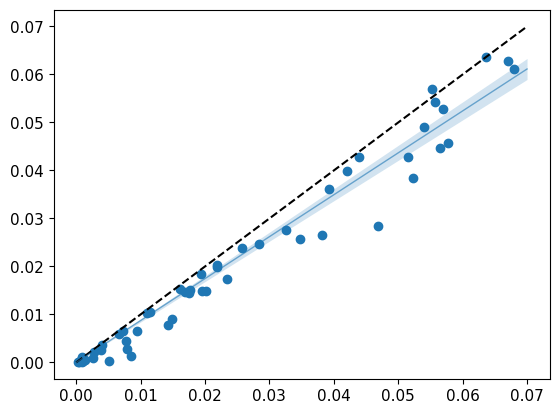

In [26]:
X = df["reg_mae"]
Y = df["hl_mae"]
b_hat = np.dot(X.T, Y) / np.dot(X.T, X)
res = Y - b_hat * X
ss_res = np.sum(res ** 2)
p = 0
n = len(X)
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - p - 1)
se_b = np.sqrt(ss_res / (np.dot(X.T, X) * (n - p - 1)))
x = np.linspace(0, 0.07, 100)
low = b_hat * x - t_star * se_b * np.abs(x)
high = b_hat * x + t_star * se_b * np.abs(x)

plt.scatter(X, Y)
plt.plot(x, x, color='black', linewidth=1.5, linestyle="dashed")
plt.plot(x, b_hat * x, color="tab:blue", alpha=0.6, linewidth=1)
plt.fill_between(x, low, high, color="tab:blue", alpha=0.2, linewidth=0)
#plt.title("Test MAE by Game", fontsize=16)
plt.tick_params(axis='both', labelsize=11)
#plt.xlabel(r"$\ell_2$", fontsize=14)
#plt.ylabel("HL", fontsize=14, rotation="horizontal")
#plt.xticks([0, 0.02, 0.1, 0.15, 0.2])
#plt.yticks([0, 0.05, 0.1, 0.15, 0.2])


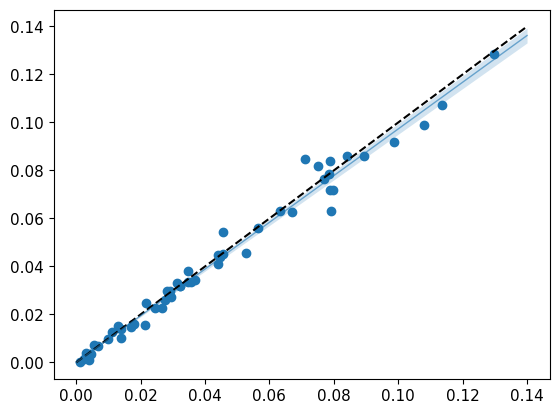

In [27]:
X = np.sqrt(df["reg_mse"])
Y = np.sqrt(df["hl_mse"])
b_hat = np.dot(X.T, Y) / np.dot(X.T, X)
res = Y - b_hat * X
ss_res = np.sum(res ** 2)
p = 0
n = len(X)
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - p - 1)
se_b = np.sqrt(ss_res / (np.dot(X.T, X) * (n - p - 1)))
x = np.linspace(0, 0.14, 100)
low = b_hat * x - t_star * se_b * np.abs(x)
high = b_hat * x + t_star * se_b * np.abs(x)
plt.scatter(X, Y)
plt.plot(x, x, color='black', linewidth=1.5, linestyle="dashed")
plt.plot(x, b_hat * x, color="tab:blue", alpha=0.6, linewidth=1)
plt.fill_between(x, low, high, color="tab:blue", alpha=0.2, linewidth=0)
#plt.xlabel(r"$\ell_2$", fontsize=28)
#plt.title("Test RMSE by Game", fontsize=16)
plt.tick_params(axis='both', labelsize=11)
#plt.ylabel("HL-Gaussian", fontsize=14)
# plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
# plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])

Text(0.5, 1.0, 'Atari MAE')

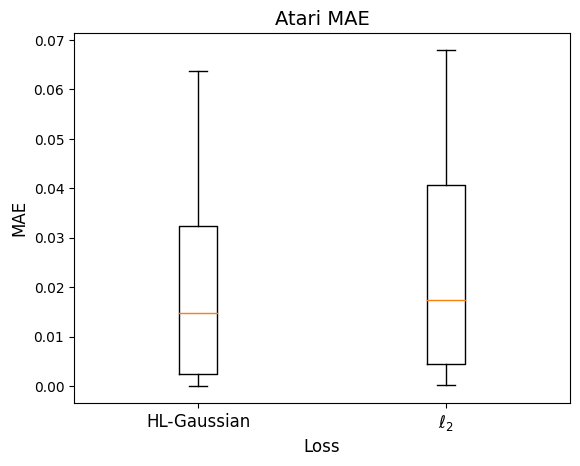

In [29]:
data = df[["hl_mae", "reg_mae"]]
plt.boxplot(data, labels=["HL-Gaussian", r"$\ell_2$"])
plt.xlabel("Loss", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.title("Atari MAE", fontsize=14)

Text(0.5, 1.0, 'Atari RMSE')

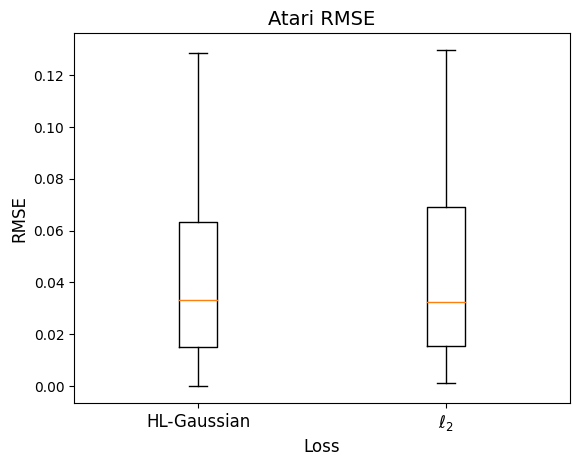

In [31]:
data = np.sqrt(df[["hl_mse", "reg_mse"]])
plt.boxplot(data, labels=["HL-Gaussian", r"$\ell_2$"])
plt.xlabel("Loss", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.title("Atari RMSE", fontsize=14)